In [13]:
import pandas as pd
from sqlalchemy import create_engine
from datetime import datetime
from datetime import timedelta
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt

In [3]:
final = "final_df.csv"

In [4]:
final_df = pd.read_csv(final)
final_df.head()

,Date,Rate Per Mile,Gasoline - All Grades,Avo Average Price,Temp (F),Transport_Rates,Gas_Prices,Avocado_Prices,Temperature_F
0,2015-01-05,NaN,2.308,0.95,58.379167,2.687361,2.308,0.95,58.379167
1,2015-01-12,NaN,2.232,1.01,60.339630,2.687361,2.232,1.01,60.339630
2,2015-01-19,NaN,2.157,1.03,58.188333,2.687361,2.157,1.03,58.188333
3,2015-01-26,NaN,2.133,1.04,64.723750,2.687361,2.133,1.04,64.723750
4,2015-02-02,NaN,2.154,0.89,60.628333,2.687361,2.154,0.89,60.628333


In [5]:
X = final_df[["Transport_Rates", "Gas_Prices", "Temperature_F"]]
y = final_df["Avocado_Prices"].values.reshape(-1, 1)
print(X.shape, y.shape)

(204, 3) (204, 1)


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

In [11]:
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.2518655670430605
Testing Score: 0.21361807180358272


Text(0.5, 1.0, 'Residual Plot')

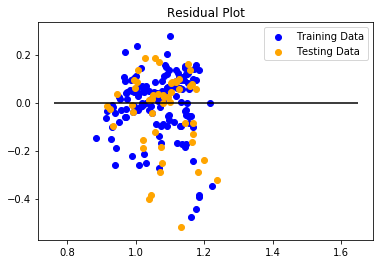

In [14]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

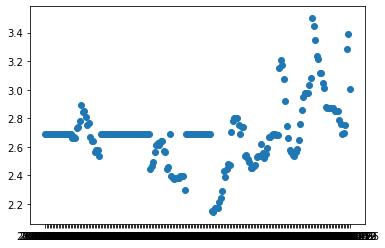

In [15]:
plt.scatter(final_df['Date'], final_df['Transport_Rates'])

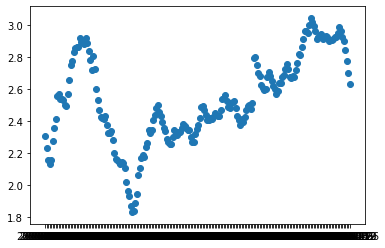

In [16]:
plt.scatter(final_df['Date'], final_df['Gas_Prices'])

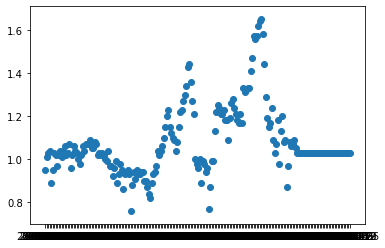

In [17]:
plt.scatter(final_df['Date'], final_df['Avocado_Prices'])

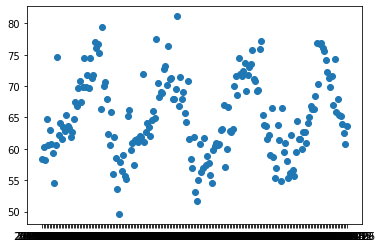

In [18]:
plt.scatter(final_df['Date'], final_df['Temperature_F'])

In [19]:
final_df.corr()

,Rate Per Mile,Gasoline - All Grades,Avo Average Price,Temp (F),Transport_Rates,Gas_Prices,Avocado_Prices,Temperature_F
Rate Per Mile,1.000000,0.686623,-0.177164,0.019951,1.000000,0.686623,-0.339777,0.019951
Gasoline - All Grades,0.686623,1.000000,0.327085,0.260897,0.440535,1.000000,0.156683,0.260897
Avo Average Price,-0.177164,0.327085,1.000000,0.431564,-0.268752,0.327085,1.000000,0.431564
Temp (F),0.019951,0.260897,0.431564,1.000000,0.015311,0.260897,0.370747,1.000000
Transport_Rates,1.000000,0.440535,-0.268752,0.015311,1.000000,0.440535,-0.270286,0.015311
Gas_Prices,0.686623,1.000000,0.327085,0.260897,0.440535,1.000000,0.156683,0.260897
Avocado_Prices,-0.339777,0.156683,1.000000,0.370747,-0.270286,0.156683,1.000000,0.370747
Temperature_F,0.019951,0.260897,0.431564,1.000000,0.015311,0.260897,0.370747,1.000000


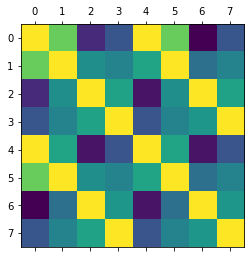

In [20]:
plt.matshow(final_df.corr())
plt.show()

In [21]:
a_final_df = final_df.set_index('Date')

In [22]:
a_final_df.index = pd.to_datetime(a_final_df.index)

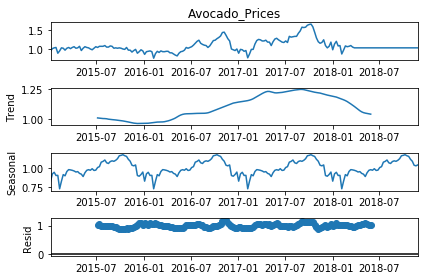

In [23]:
import plotly
# import chart_studio.plotly as py
# import plotly.graph_objects as go
from  plotly.offline import plot
import cufflinks as cf
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(a_final_df['Avocado_Prices'], model='multiplicative', period=52)
fig = result.plot()
# py.iplot(fig)

In [40]:
train = a_final_df['Avocado_Prices'].loc['2015-01-01':'2017-07-31']
test = a_final_df['Avocado_Prices'].loc['2017-08-01':'2018-03-26']

In [34]:
from pmdarima.arima import auto_arima
# from pmdarima.model_selection import train_test_split
stepwise_model = auto_arima(a_final_df['Avocado_Prices'], start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.91 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-388.695, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-429.176, Time=0.26 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.77 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-386.696, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=-444.610, Time=0.53 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.60 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.98 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=-446.603, Time=0.38 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=-431.165, Time=0.18 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=1.80 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.97 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=-444.610, Time=0.36 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=inf, Time=2.14 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=-444.611, T

In [41]:
stepwise_model.fit(train)

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [42]:
train.shape

(135,)

In [43]:
test.shape

(34,)

In [44]:
future_forecast = stepwise_model.predict(n_periods=34)
# This returns an array of predictions:
print(future_forecast)

[1.36888016 1.3145611  1.3599604  1.37033953 1.38552902 1.33328903
 1.35635897 1.36502931 1.34494893 1.38469053 1.3099607  1.31925118
 1.41077693 1.41734009 1.48845767 1.51085424 1.51638768 1.48677979
 1.47971257 1.49565418 1.48342955 1.53069961 1.50111707 1.47479942
 1.5552263  1.56447754 1.60860346 1.60448527 1.60039694 1.56313379
 1.56501318 1.58722581 1.56236627 1.64783223]


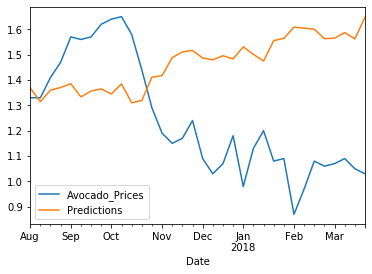

In [45]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['Predictions'])
pd.concat([test,future_forecast],axis=1).plot()